In [1]:
import braidz_analysis as bz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
from tqdm import tqdm
import scipy
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde
import pynumdiff

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import seaborn as sns

base_folder = r"C:\Users\pandey\Desktop\Braidz Files"
cm2inch = 1 / 2.54

2025-01-23 10:13:58,037 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [ ]:
!pip install git+https://github.com/elhananby/braidz_analysis --update


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


In [2]:
J74_raw_data = bz.braidz.read_braidz(["20240911_151201.braidz", "20240913_141235.braidz", "20240915_140001.braidz"], base_folder)
J73_raw_data = bz.braidz.read_braidz(["20240912_140309.braidz", "20240914_140037.braidz"], base_folder)
J72_raw_data = bz.braidz.read_braidz(["20240925_141823.braidz", "20240926_135859.braidz"], base_folder)
J76_raw_data = bz.braidz.read_braidz(["20240927_140036.braidz","20240928_140534.braidz"], base_folder)
J20_raw_data = bz.braidz.read_braidz(["20241026_135608.braidz", "20241029_142122.braidz", "20241030_135421.braidz"], base_folder )
J36_raw_data = bz.braidz.read_braidz(["20241103_140002.braidz", "20241111_151728.braidz"], base_folder)
J31_raw_data = bz.braidz.read_braidz(["20241109_185224.braidz", "20241209_141918.braidz", "20241211_140152.braidz"], base_folder )
J59_raw_data = bz.braidz.read_braidz(["20241210_140025.braidz", "20241212_145945.braidz", "20241214_141136.braidz"], base_folder)
J71_raw_data = bz.braidz.read_braidz(["20241220_140225.braidz", "20241222_140931.braidz"], base_folder)
J75_raw_data = bz.braidz.read_braidz(["20241221_141940.braidz", "20241223_140135.braidz", "20241227_135805.braidz"], base_folder)
J64_raw_data = bz.braidz.read_braidz(["20240924_161949.braidz", "20241206_140404.braidz"], base_folder)








In [ ]:
J74_raw_data["opto"]


,obj_id,frame,x,y,z,xvel,yvel,zvel,P00,P01,...,P11,P12,P22,P33,P44,P55,heading,exp_num,sham,timestamp
0,132,575757,-0.001306,-0.023692,0.221906,-0.091830,0.212120,-0.033187,4.805120e-08,-1.070537e-08,...,5.080763e-08,-2.707663e-08,7.813796e-08,0.000866,0.000874,0.001018,1.951385,0,NaN,NaN
1,132,576980,0.023093,0.000096,0.158032,-0.214175,-0.017375,0.085286,3.762007e-08,-1.953232e-09,...,3.794867e-08,-7.230256e-09,7.564455e-08,0.000802,0.000811,0.001028,-3.074175,0,NaN,NaN
2,156,1041294,-0.015914,-0.018099,0.152073,0.008598,0.182493,-0.031460,3.190673e-08,-1.440921e-09,...,2.933423e-08,-1.610830e-09,5.705912e-08,0.000765,0.000744,0.000936,1.546692,0,NaN,NaN
3,163,1118370,0.012472,-0.020603,0.102841,-0.206287,0.107680,0.120120,4.456564e-08,-1.433265e-09,...,4.280473e-08,-6.723272e-09,1.081992e-07,0.000848,0.000846,0.001167,2.695355,0,NaN,NaN
4,182,1299754,0.004043,0.006885,0.100221,-0.022374,-0.103611,0.088202,3.578343e-08,-1.172344e-09,...,3.406668e-08,-3.308276e-09,7.823970e-08,0.000797,0.000783,0.001046,-2.838684,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,229584,6768114,-0.012514,0.019531,0.123893,-0.161365,-0.418403,-0.152420,4.528260e-08,-2.868339e-09,...,4.313298e-08,-8.850179e-09,9.416385e-08,0.000851,0.000847,0.001105,-1.905523,2,False,1.726469e+09
74,235805,7478247,-0.007685,-0.023325,0.126316,0.227894,-0.003589,-0.049726,4.420498e-08,-1.816834e-09,...,4.115346e-08,-6.477827e-09,9.456582e-08,0.000858,0.000845,0.001138,0.020060,2,False,1.726476e+09
75,236977,7632996,0.020667,0.013734,0.108559,-0.173159,0.009536,-0.019224,4.337864e-08,-2.283527e-09,...,4.324682e-08,-8.954060e-09,1.028897e-07,0.000841,0.000848,0.001145,3.062040,2,True,1.726477e+09
76,236977,7633927,-0.022623,-0.009665,0.126366,0.026619,0.043337,-0.017988,4.594617e-08,-2.346958e-09,...,4.220965e-08,-7.175884e-09,9.397822e-08,0.000855,0.000842,0.001106,1.738082,2,False,1.726477e+09


In [3]:
J74_opto_data = bz.processing.get_stim_or_opto_data(J74_raw_data["df"], J74_raw_data["opto"], type="opto")
J73_opto_data = bz.processing.get_stim_or_opto_data(J73_raw_data["df"], J73_raw_data["opto"], type="opto")
J72_opto_data = bz.processing.get_stim_or_opto_data(J72_raw_data["df"], J72_raw_data["opto"], type="opto")
J76_opto_data = bz.processing.get_stim_or_opto_data(J76_raw_data["df"], J76_raw_data["opto"], type="opto")
J20_opto_data = bz.processing.get_stim_or_opto_data(J20_raw_data["df"], J20_raw_data["opto"], type="opto")
J31_opto_data = bz.processing.get_stim_or_opto_data(J31_raw_data["df"], J31_raw_data["opto"], type="opto")
J36_opto_data = bz.processing.get_stim_or_opto_data(J36_raw_data["df"], J36_raw_data["opto"], type="opto")
J59_opto_data = bz.processing.get_stim_or_opto_data(J59_raw_data["df"], J59_raw_data["opto"], type="opto")
J71_opto_data = bz.processing.get_stim_or_opto_data(J71_raw_data["df"], J71_raw_data["opto"], type="opto")
J75_opto_data = bz.processing.get_stim_or_opto_data(J75_raw_data["df"], J75_raw_data["opto"], type="opto")
J64_opto_data = bz.processing.get_stim_or_opto_data(J64_raw_data["df"], J64_raw_data["opto"], type="opto")









saccades = bz.processing.get_stim_or_opto_response_data(J74_raw_data["df"], J74_raw_data["opto"], type="opto")

100%|██████████| 334/334 [00:36<00:00,  9.11it/s]


In [4]:
J74_opto_data_filtered = bz.filtering.filter_data_dict(
    J74_opto_data,
    (J74_opto_data["frames_in_radius"] >= 15) & (J74_opto_data["sham"] == 0)
)

J73_opto_data_filtered = bz.filtering.filter_data_dict(
    J73_opto_data,
    (J73_opto_data["frames_in_radius"] >= 15) & (J73_opto_data["sham"] == 0)
)

J72_opto_data_filtered = bz.filtering.filter_data_dict(
    J72_opto_data,
    (J72_opto_data["frames_in_radius"] >= 15) & (J72_opto_data["sham"] == 0)
)

J76_opto_data_filtered = bz.filtering.filter_data_dict(
    J76_opto_data,
    (J76_opto_data["frames_in_radius"] >= 15) & (J76_opto_data["sham"] == 0)
)

J20_opto_data_filtered = bz.filtering.filter_data_dict(
    J20_opto_data,
    (J20_opto_data["frames_in_radius"] >= 15) & (J20_opto_data["sham"] == 0)
)

J31_opto_data_filtered = bz.filtering.filter_data_dict(
    J31_opto_data,
    (J31_opto_data["frames_in_radius"] >= 15) & (J31_opto_data["sham"] == 0)
)

J36_opto_data_filtered = bz.filtering.filter_data_dict(
    J36_opto_data,
    (J36_opto_data["frames_in_radius"] >= 15) & (J36_opto_data["sham"] == 0)
)

J59_opto_data_filtered = bz.filtering.filter_data_dict(
    J59_opto_data,
    (J59_opto_data["frames_in_radius"] >= 15) & (J59_opto_data["sham"] == 0)
)

J71_opto_data_filtered = bz.filtering.filter_data_dict(
    J71_opto_data,
    (J71_opto_data["frames_in_radius"] >= 15) & (J71_opto_data["sham"] == 0)
)

J75_opto_data_filtered = bz.filtering.filter_data_dict(
    J75_opto_data,
    (J75_opto_data["frames_in_radius"] >= 15) & (J75_opto_data["sham"] == 0)
)

J64_opto_data_filtered = bz.filtering.filter_data_dict(
    J64_opto_data,
    (J64_opto_data["frames_in_radius"] >= 15) & (J64_opto_data["sham"] == 0)
)




In [ ]:
saccades_filtered = bz.filtering.filter_data_dict(
    saccades,
    (saccades["frames_in_radius"]>=15) & (saccades["sham"] == 0)
)

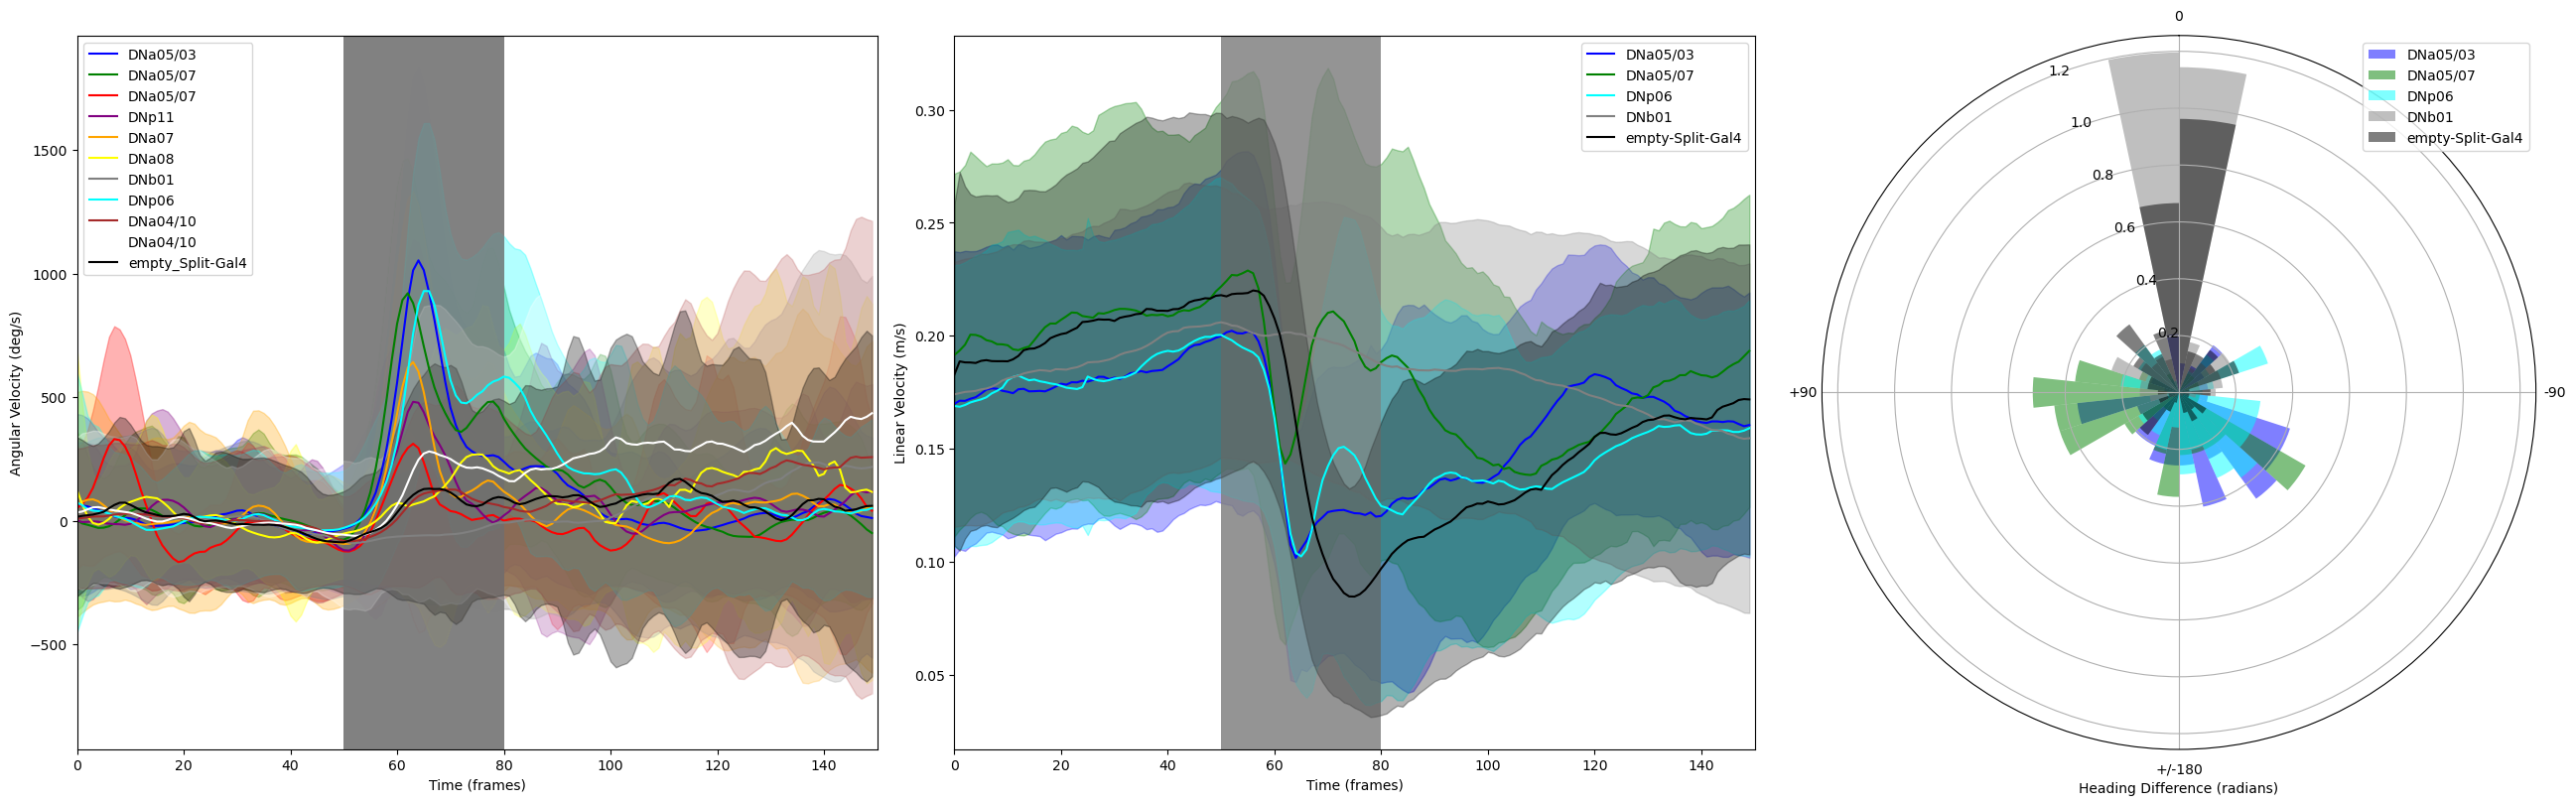

In [14]:
fig = plt.figure(figsize=(26, 8), constrained_layout=True)

# Angular velocity
ax1 = fig.add_subplot(1, 3, 1)
bz.plotting.plot_angular_velocity(
    J74_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "blue",
    label = "DNa05/03"

)

bz.plotting.plot_angular_velocity(
    J73_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "green",
    label = "DNa05/07"
)


bz.plotting.plot_angular_velocity(
    J72_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "red",
    label = "DNa05/07"
)

bz.plotting.plot_angular_velocity(
    J76_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "purple",
    label = "DNp11"
)

bz.plotting.plot_angular_velocity(
    J20_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "orange",
    label = "DNa07"
)

bz.plotting.plot_angular_velocity(
    J36_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "yellow",
    label = "DNa08"
)

bz.plotting.plot_angular_velocity(
    J31_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "gray",
    label = "DNb01"
)

bz.plotting.plot_angular_velocity(
    J59_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "cyan",
    label = "DNp06"
)

bz.plotting.plot_angular_velocity(
    J71_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "brown",
    label = "DNa04/10"
)

bz.plotting.plot_angular_velocity(
    J75_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "white",
    label = "DNa04/10"
)

bz.plotting.plot_angular_velocity(
    J64_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "black",
    label = "empty_Split-Gal4"
)

ax1.legend(loc="best")



# Linear velocity
ax2 = fig.add_subplot(1, 3, 2)
bz.plotting.plot_linear_velocity(
    J74_opto_data_filtered,
    ax = ax2,
    color = "blue",
    label = "DNa05/03"
)

bz.plotting.plot_linear_velocity(
    J73_opto_data_filtered,
    ax = ax2,
    color = "green",
    label = "DNa05/07"
)

bz.plotting.plot_linear_velocity(
    J59_opto_data_filtered,
    ax = ax2,
    color = "cyan",
    label = "DNp06"

)

bz.plotting.plot_linear_velocity(
    J31_opto_data_filtered,
    ax = ax2,
    color = "gray",
    label = "DNb01"
)

bz.plotting.plot_linear_velocity(
    J64_opto_data_filtered,
    ax = ax2,
    color = "black",
    label = "empty-Split-Gal4"
)

ax2.legend(loc="best")


# Heading difference
ax3 = fig.add_subplot(1, 3, 3, projection='polar')
bz.plotting.plot_heading_difference(J74_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="blue", label="DNa05/03", alpha=0.5)
bz.plotting.plot_heading_difference(J73_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="green", label="DNa05/07", alpha=0.5)
bz.plotting.plot_heading_difference(J59_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="cyan", label="DNp06", alpha=0.5)
bz.plotting.plot_heading_difference(J31_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="gray", label="DNb01", alpha=0.5)
bz.plotting.plot_heading_difference(J64_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="black", label="empty-Split-Gal4", alpha=0.5)

ax3.legend(loc="best")



# Set 0 so it's pointing "North"
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax3.set_ylabel("")
plt.show()

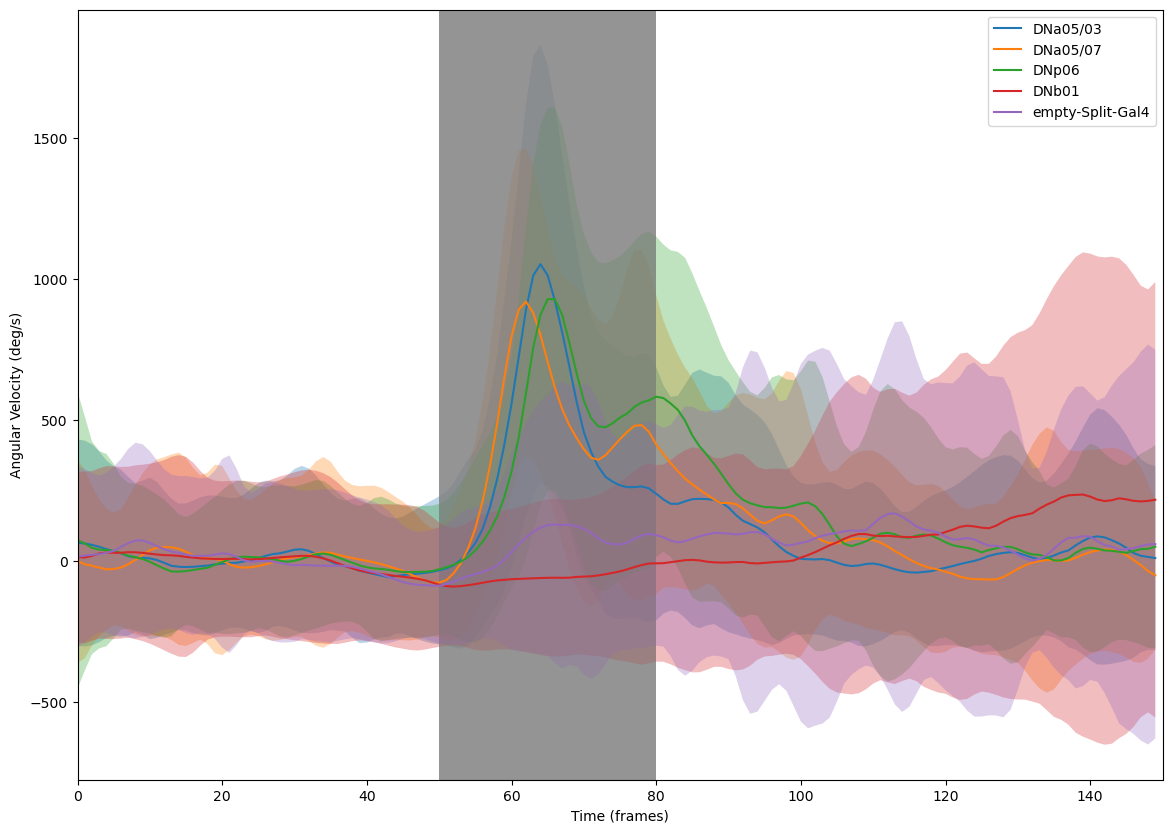

In [46]:
fig = plt.figure(figsize=(14, 10), constrained_layout=False)
ax1 = fig.add_subplot()
bz.plotting.plot_angular_velocity(
    J74_opto_data_filtered,
    ax= ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    label = "DNa05/03"

)

bz.plotting.plot_angular_velocity(
    J73_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    label = "DNa05/07"
)


bz.plotting.plot_angular_velocity(
    J59_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    label = "DNp06"
)

bz.plotting.plot_angular_velocity(
    J31_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    label = "DNb01"
)

bz.plotting.plot_angular_velocity(
    J64_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    label = "empty-Split-Gal4"
)

ax1.legend(loc="best")
plt.show()





In [15]:
def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [16]:
def sg_smooth(df, columns = ["x", "y", "z", "xvel", "yvel"], **kwargs):
    """
    Apply Savitzky-Golay filter to smooth specified columns in a DataFrame.
    """
    for col in columns:
        df[col] = savgol_filter(df[col], window_length=kwargs.get("window_length", 21), polyorder=kwargs.get("polyorder", 3))
    return df

def detect_response_peak(angular_velocity, start_idx, search_window=50, height=np.deg2rad(300), distance=50):
    """
    Detects the response peak in the angular velocity signal within a specified search window.
    """
    from scipy.signal import find_peaks

    # Define search region
    end_idx = min(start_idx + search_window, len(angular_velocity))
    search_region = angular_velocity[start_idx:end_idx]

    # Look for peaks in both directions
    peaks_pos, _ = find_peaks(search_region, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-search_region, height=height, distance=distance)

    all_peaks = np.concatenate([peaks_pos, peaks_neg])
    response_direction = ["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg)

    sort_idx = np.argsort(all_peaks)
    all_peaks = all_peaks[sort_idx]
    response_direction = np.array(response_direction)[sort_idx]

    if len(all_peaks) > 0:
        # Return the first peak found (relative to stimulus onset)
        return start_idx + all_peaks[0], response_direction[0]
    return None, None


def compute_heading_change(
    theta_unwrap,
    center_idx,
    k_frames=10,
    method="mean",
    buffer_frames=None,
    x=None,
    y=None,
):
    """
    Compute the change in heading around a specified index using different methods.
    """
    if method == "mean":
        # Ensure bounds including buffer if specified
        buffer = buffer_frames if buffer_frames is not None else 0
        total_frames_needed = k_frames + buffer

        if (
            center_idx - total_frames_needed < 0
            or center_idx + total_frames_needed >= len(theta_unwrap)
        ):
            return None

        # Compute mean heading before and after, respecting buffer
        pre_heading = np.mean(
            theta_unwrap[center_idx - total_frames_needed : center_idx - buffer]
        )
        post_heading = np.mean(
            theta_unwrap[center_idx + buffer : center_idx + total_frames_needed]
        )

        # Compute change and wrap to [-π, π]
        heading_change = np.arctan2(
            np.sin(post_heading - pre_heading), np.cos(post_heading - pre_heading)
        )

    elif method == "vector":
        if x is None or y is None:
            raise ValueError("x and y coordinates are required for vector method")

        # Ensure bounds
        if center_idx - k_frames < 0 or center_idx + k_frames >= len(x):
            return None

        # Get points at distance k from peak
        pre_x = x[center_idx - k_frames]
        pre_y = y[center_idx - k_frames]
        post_x = x[center_idx + k_frames]
        post_y = y[center_idx + k_frames]

        # Calculate vectors
        pre_vector = np.array([x[center_idx] - pre_x, y[center_idx] - pre_y])
        post_vector = np.array([post_x - x[center_idx], post_y - y[center_idx]])

        # Normalize vectors
        pre_vector = pre_vector / np.linalg.norm(pre_vector)
        post_vector = post_vector / np.linalg.norm(post_vector)

        # Calculate angle between vectors
        dot_product = np.clip(np.dot(pre_vector, post_vector), -1.0, 1.0)
        heading_change = np.arccos(dot_product)

        # Determine sign of angle (positive for CCW, negative for CW)
        cross_product = np.cross(pre_vector, post_vector)
        heading_change *= np.sign(cross_product)

    else:
        raise ValueError("Method must be either 'mean' or 'vector'")

    return heading_change


def process_saccade(
    sac_idx, angular_velocity, linear_velocity, x, y, z, stim_idx, theta_unwrap
):
    """
    Processes a saccade event and extracts relevant information if it meets certain criteria.
    """

    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # Skip if window is out of bounds
    if sac_idx - WINDOW_SIZE < 0 or sac_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Skip if saccade is in stimulus window
    if stim_idx is not None and stim_idx <= sac_idx <= stim_idx + WINDOW_SIZE:
        return None

    # Skip if outside arena bounds
    if not (
        ARENA_BOUNDS["z"][0] <= z[sac_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[sac_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[sac_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Extract velocity windows
    ang_vel_window = angular_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    lin_vel_window = linear_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    turning_direction = "pos" if angular_velocity[sac_idx] > 0 else "neg"

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, sac_idx, method="vector", k_frames=25, x=x, y=y
    )

    return (
        "spontaneous",
        ang_vel_window,
        lin_vel_window,
        heading_change,
        turning_direction,
    )


def process_stimulus_window(
    stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap, default_delay=30
):
    """
    Process the stimulus window, including heading change calculation.
    """
    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # First check if initial window is out of bounds
    if stim_idx - WINDOW_SIZE < 0 or stim_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Check arena bounds at stimulus time
    if not (
        ARENA_BOUNDS["z"][0] <= z[stim_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[stim_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[stim_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Try to detect a response
    response_idx, response_direction = detect_response_peak(
        angular_velocity,
        stim_idx,
        search_window=50,
        height=np.deg2rad(300),
        distance=10,
    )

    if response_idx is not None:
        # Response detected - align to response
        center_idx = response_idx
        group = "stimulus_response"
    else:
        # No response detected - use default delay
        center_idx = stim_idx + default_delay
        group = "stimulus_no_response"
        response_direction = "none"

    # Check if the aligned window is within bounds
    if center_idx - WINDOW_SIZE < 0 or center_idx + WINDOW_SIZE >= len(
        angular_velocity
    ):
        return None

    # Extract velocity windows aligned to either response or default delay
    ang_vel_window = angular_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]
    lin_vel_window = linear_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, center_idx, method="vector", k_frames=25, x=x, y=y
    )
    return group, ang_vel_window, lin_vel_window, heading_change, response_direction


def detect_saccades_both(angular_velocity, height=np.deg2rad(300), distance=40):
    """
    Detect saccades in both positive and negative directions.
    """
    from scipy.signal import find_peaks

    peaks_pos, _ = find_peaks(angular_velocity, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-angular_velocity, height=height, distance=distance)

    peaks_concat = np.concatenate([peaks_pos, peaks_neg])

    # get directions list
    directions = np.array(["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg))

    # get sorting indices
    sort_idx = np.argsort(peaks_concat)

    # return sorted peaks and directions
    return peaks_concat[sort_idx], np.array(directions)[sort_idx]


def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [31]:
J74_Results= process_all_trajectories(J74_raw_data["opto"], J74_raw_data["df"])
J73_Results= process_all_trajectories(J73_raw_data["opto"], J73_raw_data["df"])
J59_Results= process_all_trajectories(J59_raw_data["opto"], J59_raw_data["df"])
J64_Results= process_all_trajectories(J64_raw_data["opto"], J64_raw_data["df"])
J31_Results= process_all_trajectories(J31_raw_data["opto"], J31_raw_data["df"])


  0%|          | 0/334 [00:00<?, ?it/s]C:\Users\pandey\AppData\Local\Temp\ipykernel_14772\341144974.py:99: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(pre_vector, post_vector)
100%|██████████| 1011/1011 [02:36<00:00,  6.47it/s]


C:\Users\pandey\AppData\Local\Temp\ipykernel_14772\876011240.py:101: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=df_cleaned, x="Group", y="Percentage", hue="Direction", palette=cp)


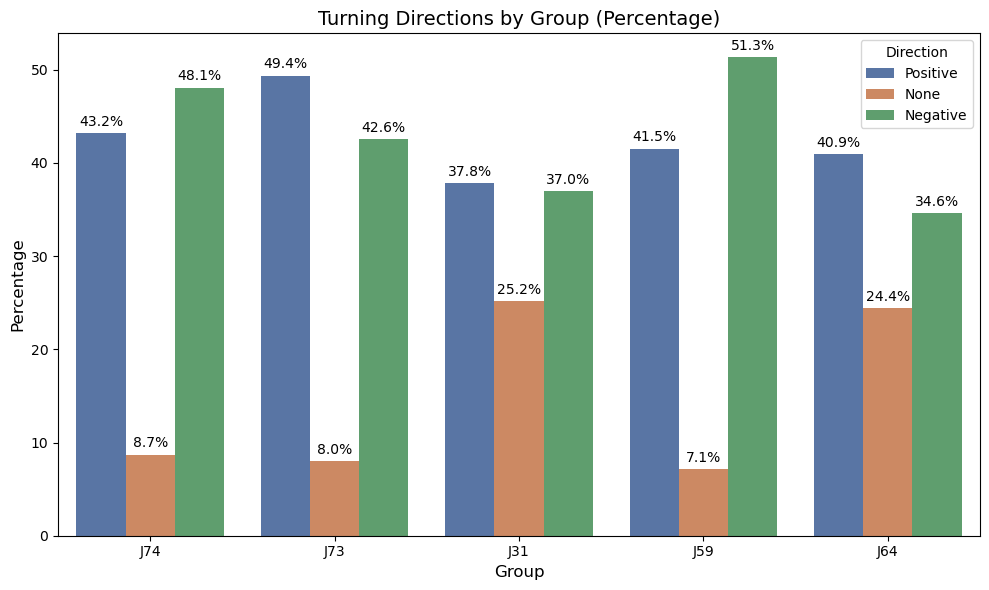

In [34]:
# create long dataframe with all data
J74_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J74_Results["groups"]]
)
J74_turning_directions = np.array(J74_Results["turning_directions"])[
    J74_stimulus_mask
]
J74_pos_turn_count = sum(J74_turning_directions == "pos")
J74_neg_turn_count = sum(J74_turning_directions == "neg")
J74_none_turn_count = sum(J74_turning_directions == "none")

J73_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J73_Results["groups"]]
)
J73_turning_directions = np.array(J73_Results["turning_directions"])[
    J73_stimulus_mask
]
J73_pos_turn_count = sum(J73_turning_directions == "pos")
J73_neg_turn_count = sum(J73_turning_directions == "neg")
J73_none_turn_count = sum(J73_turning_directions == "none")

J31_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J31_Results["groups"]]
)
J31_turning_directions = np.array(J31_Results["turning_directions"])[
    J31_stimulus_mask
]
J31_pos_turn_count = sum(J31_turning_directions == "pos")
J31_neg_turn_count = sum(J31_turning_directions == "neg")
J31_none_turn_count = sum(J31_turning_directions == "none")

J59_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J59_Results["groups"]]
)
J59_turning_directions = np.array(J59_Results["turning_directions"])[
    J59_stimulus_mask
]
J59_pos_turn_count = sum(J59_turning_directions == "pos")
J59_neg_turn_count = sum(J59_turning_directions == "neg")
J59_none_turn_count = sum(J59_turning_directions == "none")

J64_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J64_Results["groups"]]
)
J64_turning_directions = np.array(J64_Results["turning_directions"])[
    J64_stimulus_mask
]
J64_pos_turn_count = sum(J64_turning_directions == "pos")
J64_neg_turn_count = sum(J64_turning_directions == "neg")
J64_none_turn_count = sum(J64_turning_directions == "none")



# Create initial DataFrame with counts
data = {
    "Group": ["J74"] * 3 + ["J73"] * 3 + ["J31"] * 3 + ["J59"] * 3 + ["J64"] * 3,
    "Direction": ["Positive", "None", "Negative"] * 5,
    "Count": [
        # DNp03 counts
        J74_pos_turn_count,
        J74_none_turn_count,
        J74_neg_turn_count,
        # AX-Split counts
        J73_pos_turn_count,
        J73_none_turn_count,
        J73_neg_turn_count,
        # Empty-split counts
        J31_pos_turn_count,
        J31_none_turn_count,
        J31_neg_turn_count,
        # J59 counts
        J59_pos_turn_count,
        J59_none_turn_count,
        J59_neg_turn_count,
        # J64 counts
        J64_pos_turn_count,
        J64_none_turn_count,
        J64_neg_turn_count
    ],
}

# Padding to ensure consistency (if data structure requires uniform length)
max_length = max(len(data[key]) for key in data.keys())
for key in data.keys():
    if len(data[key]) < max_length:
        data[key].extend([None] * (max_length - len(data[key])))


df = pd.DataFrame(data)

df_cleaned = df.dropna(subset=["Group", "Count"])

# Calculate total counts for each group
group_totals = df_cleaned.groupby("Group")["Count"].transform("sum")

# Calculate percentages
df_cleaned["Percentage"] = (df_cleaned["Count"] / group_totals) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x="Group", y="Percentage", hue="Direction", palette=cp)

# Add titles and labels
plt.title("Turning Directions by Group (Percentage)", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Group", fontsize=12)

# Add percentage labels on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.1f%%", padding=3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
import pandas as pd

# Initial data with mismatched lengths
data = {
    "Group": ["J74"] * 3,
    "Direction": ["Positive", "None", "Negative"] * 3,
    "Count": [124, 25, 138]  # Length = 3
}

# Fix the lengths
max_length = max(len(v) for v in data.values())
for key in data.keys():
    while len(data[key]) < max_length:
        data[key].append(None)  # Pad with None

# Verify lengths
for key, value in data.items():
    print(f"Key: {key}, Length: {len(value)}")

# Create the DataFrame
df = pd.DataFrame(data)
print(df)


Key: Group, Length: 9
Key: Direction, Length: 9
Key: Count, Length: 9
  Group Direction  Count
0   J74  Positive  124.0
1   J74      None   25.0
2   J74  Negative  138.0
3  None  Positive    NaN
4  None      None    NaN
5  None  Negative    NaN
6  None  Positive    NaN
7  None      None    NaN
8  None  Negative    NaN


In [23]:
# Drop rows where Group or Count is missing
df_cleaned = df.dropna(subset=["Group", "Count"])
print(df_cleaned)


  Group Direction  Count
0   J74  Positive  124.0
1   J74      None   25.0
2   J74  Negative  138.0


In [27]:
# Option 3: Science journal palette (Nature style)
cp = ["#4c72b0", "#dd8452", "#55a868", "#8172b3","#da8bc3"]

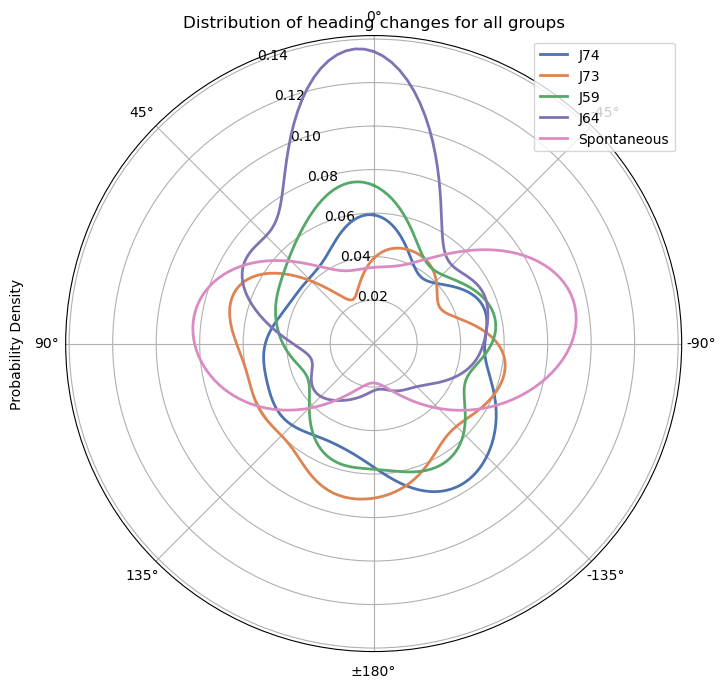

In [48]:
heading_change_J74_stim = np.array(J74_Results["heading_changes"])[
    (np.array(J74_Results["groups"]) == "stimulus_response")
    | (np.array(J74_Results["groups"]) == "stimulus_no_response")
]

heading_change_J73_stim = np.array(J73_Results["heading_changes"])[
    (np.array(J73_Results["groups"]) == "stimulus_response")
    | (np.array(J73_Results["groups"]) == "stimulus_no_response")
]

heading_change_J59_stim = np.array(J59_Results["heading_changes"])[
    (np.array(J59_Results["groups"]) == "stimulus_response")
    | (np.array(J59_Results["groups"]) == "stimulus_no_response")
]

heading_change_J64_stim = np.array(J64_Results["heading_changes"])[
    (np.array(J64_Results["groups"]) == "stimulus_response")
    | (np.array(J64_Results["groups"]) == "stimulus_no_response")
]

heading_change_spont_combined = np.concatenate(
    [
        np.array(J74_Results["heading_changes"])[
            np.array(J74_Results["groups"]) == "spontaneous"
        ],
        np.array(J73_Results["heading_changes"])[
            np.array(J73_Results["groups"]) == "spontaneous"
        ],
        np.array(J59_Results["heading_changes"])[
            np.array(J59_Results["groups"]) == "spontaneous"
        ],
        np.array(J64_Results["heading_changes"])[
            np.array(J64_Results["groups"]) == "spontaneous"
        ]
        

    ]
)



# Define colors for better visibility
colors = cp
labels = ["J74", "J73", "J59", "J64", "Spontaneous"]


# Convert degrees to radians
def to_rad(deg_array):
    return np.deg2rad(deg_array)


# Create figure
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(8, 8))
ax.set_theta_zero_location("N")

datasets = [
    heading_change_J74_stim,
    heading_change_J73_stim,
    heading_change_J59_stim,
    heading_change_J64_stim,
    heading_change_spont_combined,
]
for data, color, label in zip(datasets, colors, labels):
    # Convert to radians
    data_rad = data

    # Create evenly spaced points for evaluation
    theta = np.linspace(0, 2 * np.pi, 200)

    # Compute KDE
    # Duplicate some data points across boundaries to ensure continuity
    data_wrapped = np.concatenate(
        [data_rad, data_rad + 2 * np.pi, data_rad - 2 * np.pi]
    )
    kde = gaussian_kde(data_wrapped, bw_method=0.05)  # Adjust bw_method as needed

    # Evaluate KDE
    density = kde(theta)
    # density = density / density.max()  # Normalize

    # Plot
    ax.plot(theta, density, color=color, label=label, lw=2)

# Customize plot
# ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])  # Set radial ticks
ax.grid(True)
ax.legend()
ax.set_thetagrids(
    np.arange(0, 360, 45),
    labels=["0°", "45°", "90°", "135°", "±180°", "-135°", "-90°", "-45°"],
)

plt.title("Distribution of heading changes for all groups")
plt.ylabel("Probability Density", labelpad=30)

plt.show()

c:\Users\pandey\AppData\Local\miniforge3\envs\braidz-analysis\Lib\site-packages\braidz_analysis\helpers.py:167: RuntimeWarning: Mean of empty slice
  baseline = np.nanmean(arr[:, start_idx:end_idx], axis=1)


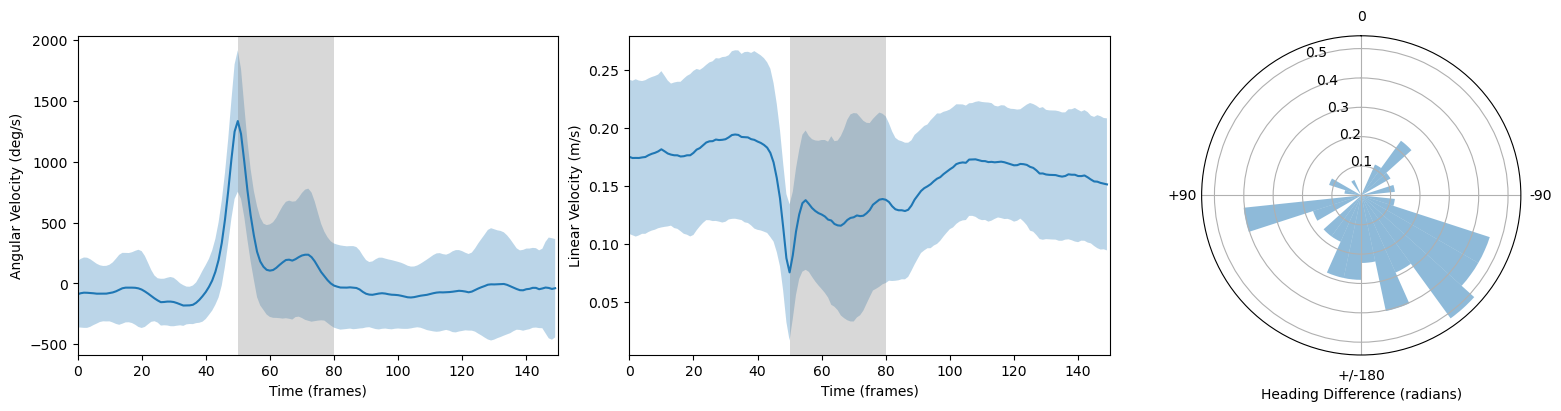

In [ ]:
fig = plt.figure(figsize=(16, 4), constrained_layout=True)

# Angular velocity
ax1 = fig.add_subplot(1, 3, 1)
bz.plotting.plot_angular_velocity(
    saccades_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    convert_to_degrees=True
)

ax2 = fig.add_subplot(1, 3, 2)
bz.plotting.plot_linear_velocity(
    saccades_filtered,
    ax = ax2,
)

# Heading difference
ax3 = fig.add_subplot(1, 3, 3, projection='polar')
bz.plotting.plot_heading_difference(saccades_filtered, ax=ax3, convert_to_degrees=False, density=True, alpha=0.5)

# Set 0 so it's pointing "North"
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax3.set_ylabel("")
plt.show()